<a href="https://colab.research.google.com/github/dhruvsuri8106-code/ECON-3916---Statistical-and-Machine-Learning/blob/main/Lab_2_FRED_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fredapi

In [7]:
import pandas as pd
import numpy as np
from fredapi import Fred
fred = Fred(api_key='0018442f5d7ec600ee4f656cf5577e9b')

In [8]:
wages = fred.get_series('AHETPI')
cpi = fred.get_series('CPIAUCSL')

In [9]:
df = pd.DataFrame({'Nominal_Wage': wages, 'CPI': cpi})

In [10]:
df = df.dropna()

In [11]:
df

,Nominal_Wage,CPI
1964-01-01,2.50,30.940
1964-02-01,2.50,30.910
1964-03-01,2.51,30.940
1964-04-01,2.52,30.950
1964-05-01,2.52,30.980
...,...,...
2025-07-01,31.35,322.132
2025-08-01,31.45,323.364
2025-09-01,31.52,324.368
2025-11-01,31.73,325.031


In [12]:
cpi_today = df['CPI'].iloc[-1]

In [27]:
def get_real_wage(nominal_col, cpi_col):


    cpi_today = cpi_col.iloc[-1]


    real_col = (nominal_col / cpi_col) * cpi_today

    return real_col


df['Real_Wage'] = get_real_wage(df['Nominal_Wage'], df['CPI'])

print(df.tail())


            Nominal_Wage      CPI  Real_Wage
2025-07-01         31.35  322.132  31.729355
2025-08-01         31.45  323.364  31.709292
2025-09-01         31.52  324.368  31.681502
2025-11-01         31.73  325.031  31.827524
2025-12-01         31.76  326.030  31.760000


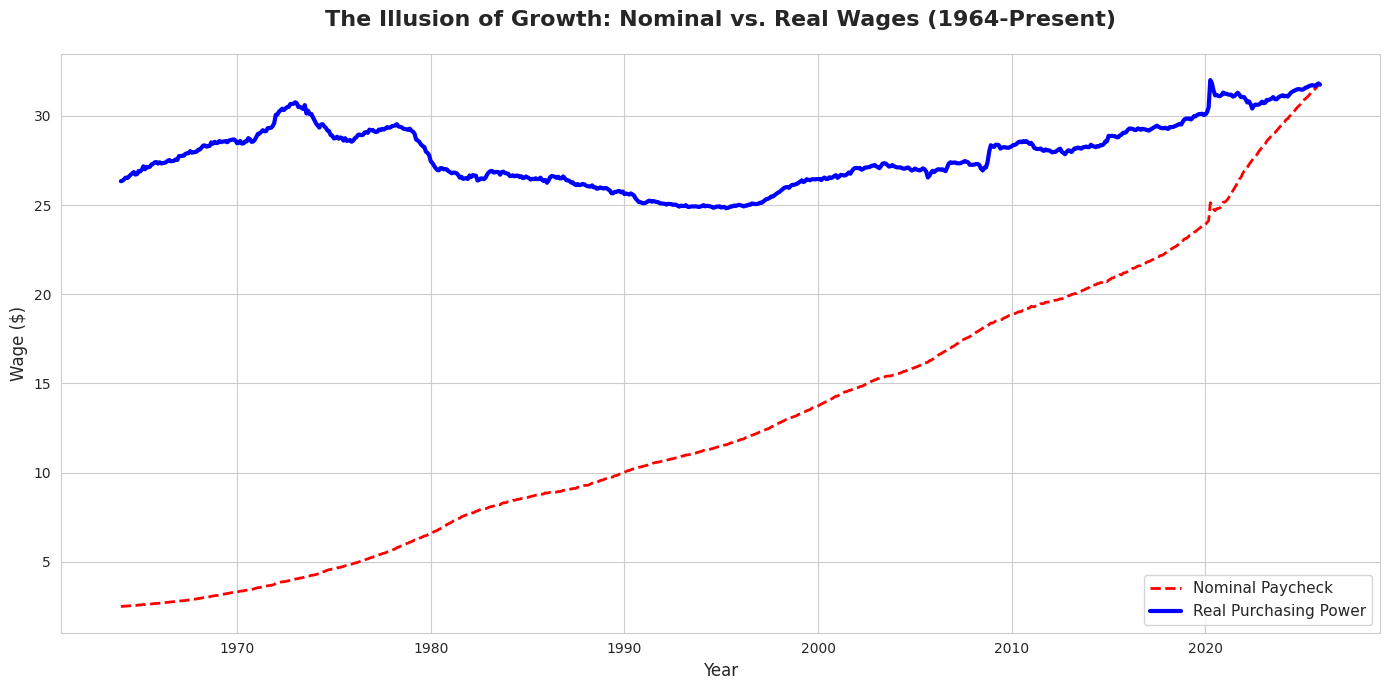

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set style
sns.set_style("whitegrid")

# Create figure
fig, ax = plt.subplots(figsize=(14, 7))

# Plot both lines
ax.plot(df.index, df['Nominal_Wage'],
        linestyle='--',
        color='red',
        linewidth=2,
        label='Nominal Paycheck')

ax.plot(df.index, df['Real_Wage'],
        color='blue',
        linewidth=3,
        label='Real Purchasing Power')

# Add title and labels
ax.set_title('The Illusion of Growth: Nominal vs. Real Wages (1964-Present)',
             fontsize=16,
             fontweight='bold',
             pad=20)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Wage ($)', fontsize=12)

# Add legend
ax.legend(loc='best', fontsize=11, frameon=True)

# Improve layout
plt.tight_layout()
plt.show()